# 1 метод


In [ ]:
!pip install nistrng

  Preparing metadata (setup.py) ... done
  Created wheel for nistrng: filename=nistrng-1.2.3-py3-none-any.whl size=38080 sha256=6cd763b94498cdc6f23092a7dc933e54e2741b87d8c44bcd5982e6342ef681ba
  Stored in directory: /root/.cache/pip/wheels/1c/8b/b4/9748dc9b9309d26efb89edfb91f5f04ce89c6716f5ef413482
Successfully built nistrng


Sample 1 (Method 1): Среднее = 2492.588, Отклонение = 1437.072068567196, Коэффицент вариации = 0.5765381477272602
Sample 2 (Method 1): Среднее = 2477.74, Отклонение = 1468.8991008234705, Коэффицент вариации = 0.5928382723060008
Sample 3 (Method 1): Среднее = 2436.38, Отклонение = 1420.1159148463903, Коэффицент вариации = 0.582879483022513
Sample 4 (Method 1): Среднее = 2483.9, Отклонение = 1459.9174230072056, Коэффицент вариации = 0.5877520926797397
Sample 5 (Method 1): Среднее = 2438.22, Отклонение = 1461.224454900752, Коэффицент вариации = 0.5992996755423022
Sample 6 (Method 1): Среднее = 2526.612, Отклонение = 1427.0993257149273, Коэффицент вариации = 0.5648272570995971
Sample 7 (Method 1): Среднее = 2519.452, Отклонение = 1462.110633192988, Коэффицент вариации = 0.5803288307111975
Sample 8 (Method 1): Среднее = 2520.412, Отклонение = 1425.659180258732, Коэффицент вариации = 0.5656452914280412
Sample 9 (Method 1): Среднее = 2508.292, Отклонение = 1429.4629056873075, Коэффицент вариа

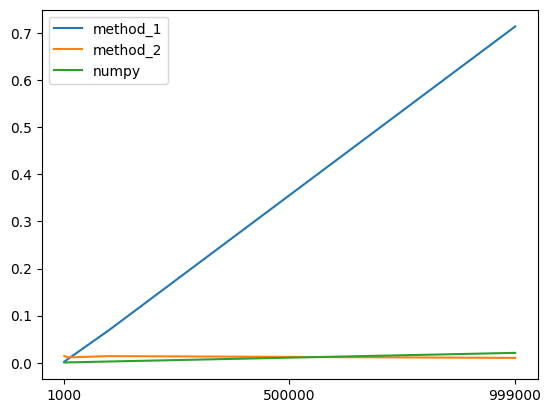

In [ ]:
import random
import time
import numpy as np
import scipy.stats as stats
import timeit
from nistrng import *
import matplotlib.pyplot as plt
from math import log

timer = timeit.default_timer

def gen_1(n, a=22695477, c=1, m=2**32):
  res = []
  s = [i for i in range(10000)]
  x = random.choice(s)
  for i in range(n):
    x = (a * x + c) % m
    res.append(x % 5000)
  return res

samples_1 = [gen_1(1000) for _ in range(20)]


def fib_gen(seed1, seed2, modul = 2**31 - 1):
  while True:
    next_seed = (seed1 + seed2) % modul
    seed1, seed2 = seed2, next_seed
    yield next_seed

def gen_2(n, samp_cnt = 20):
  samples = []
  for i in range(samp_cnt):
    seed1, seed2 = i, i + 1
    gen = fib_gen(seed1, seed2)
    sample = [next(gen) % 5000 for _ in range(1000)]
    samples.append(sample)
  return samples


samples_2 = gen_2(1000)

for i, sample in enumerate(samples_1):
    print(f"Sample {i+1} (Method 1): Среднее = {np.mean(sample)}, Отклонение = {np.std(sample)}, Коэффицент вариации = {np.std(sample)/np.mean(sample)}")

for i, sample in enumerate(samples_2):
    print(f"Sample {i+1} (Method 2): Среднее = {np.mean(sample)}, Отклонение = {np.std(sample)}, Коэффицент вариации = {np.std(sample)/np.mean(sample)}")


for i, sample in enumerate(samples_1):
    frequencies, _ = np.histogram(sample, bins=np.arange(5001))
    print(f"Выборка {i+1} (метод 1): Хи-квадрат не отвергается с вероятностью = {stats.chisquare(frequencies)[1]}")

for i, sample in enumerate(samples_2):
    frequencies, _ = np.histogram(sample, bins=np.arange(5001))
    print(f"Выборка {i+1} (метод 2): Хи-квадрат не отвергается с вероятностью = {stats.chisquare(frequencies)[1]}")


for samples in [samples_1[:5], samples_2[:5]]:
    for i, sample in enumerate(samples):

        binary_sequence: np.ndarray = pack_sequence(samples)
        eligible_battery: dict = check_eligibility_all_battery(binary_sequence, SP800_22R1A_BATTERY)

        print(f'Eligible test from NIST-SP800-22r1a for sample {i}:')
        for name in eligible_battery.keys():
            print("-" + name)
        # Test the sequence on the eligible tests
        results = run_all_battery(binary_sequence, eligible_battery, False)
        # Print results one by one
        print("Test results:")
        for result, elapsed_time in results:
            if result.passed:
                print("- PASSED - score: " + str(np.round(result.score, 3)) + " - " + result.name + " - elapsed time: " + str(elapsed_time) + " ms")
            else:
                print("- FAILED - score: " + str(np.round(result.score, 3)) + " - " + result.name + " - elapsed time: " + str(elapsed_time) + " ms")

method_1 = []
method_2 = []
method_numpy = []

for n in [1000, 10000, 100000, 1000000]:
    start = timer()
    gen_1(n)
    print(f"Time for generating {n} numbers using Method 1: {timer() - start}")
    method_1.append(timer() - start)

    start = timer()
    gen_2(n)
    print(f"Time for generating {n} numbers using Method 2: {timer() - start}")
    method_2.append(timer() - start)

    start = timer()
    np.random.randint(0, 5000, size=n)
    print(f"Time for generating {n} numbers using numpy: {timer() - start}")
    method_numpy.append(timer() - start)


plt.plot([1000, 10000, 100000, 1000000], method_1, [1000, 10000, 100000, 1000000], method_2, [1000, 10000, 100000, 1000000], method_numpy)
plt.legend(['method_1', 'method_2', 'numpy'])
plt.xticks(range(1000, 1000000, 499000))
plt.show()

# plt.plot([1000, 10000, 100000, 1000000], method_2, color = 'g')
# plt.xticks(range(1000, 1000000, 499000))
# plt.show()

# plt.plot([1000, 10000, 100000, 1000000], method_numpy, color = 'r')
# plt.xticks(range(1000, 1000000, 499000))
# plt.show()


